In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Regression\Concrete Compressive Strength.csv")
df.head(3)

Cement  Blast_Furnance_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                  0.0      0.0  162.0               2.5   
1   540.0                  0.0      0.0  162.0               2.5   
2   332.5                142.5      0.0  228.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_Day  Concrete_Strength  
0            1040.0           676.0       28          79.986111  
1            1055.0           676.0       28          61.887366  
2             932.0           594.0      270          40.269535

In [3]:
df.describe()

Cement  Blast_Furnance_Slag      Fly_Ash        Water  \
count  1030.000000          1030.000000  1030.000000  1030.000000   
mean    281.165631            73.895485    54.187136   181.566359   
std     104.507142            86.279104    63.996469    21.355567   
min     102.000000             0.000000     0.000000   121.750000   
25%     192.375000             0.000000     0.000000   164.900000   
50%     272.900000            22.000000     0.000000   185.000000   
75%     350.000000           142.950000   118.270000   192.000000   
max     540.000000           359.400000   200.100000   247.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate      Age_Day  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete_Strength  
count        1030.000000  
mean           35.817836  
std            16.705679  
min             2.331808  
25%            23.707115  
50%            34.442774  
75%            46.136287  
max            82.599225

In [4]:
df.shape

(1030, 9)

In [5]:
q1 = df['Age_Day'].quantile(0.25)
q3 = df['Age_Day'].quantile(0.75)

iqr = q3 - q1
min_range = q1 - (iqr*1.5)
max_range = q3 + (iqr*1.5)

df = df[df['Age_Day'] <= max_range]

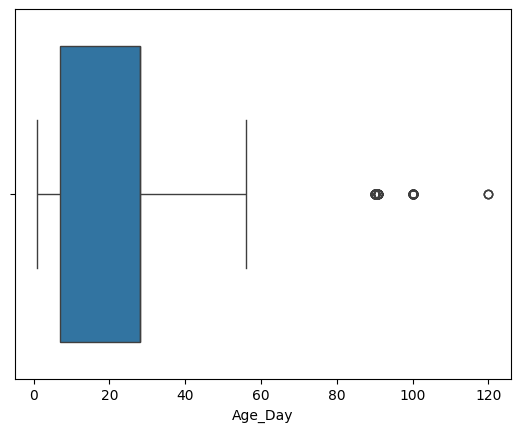

In [6]:
sns.boxplot(x = 'Age_Day', data=df)
plt.show()

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.sample(4)

Cement  Blast_Furnance_Slag  Fly_Ash  Water  Superplasticizer  \
712   192.0                288.0      0.0  192.0               0.0   
18    380.0                 95.0      0.0  228.0               0.0   
808   252.0                  0.0      0.0  186.0               0.0   
608   236.0                  0.0      0.0  194.0               0.0   

     Coarse_Aggregate  Fine_Aggregate  Age_Day  Concrete_Strength  
712             929.8           716.1        7          21.480625  
18              932.0           594.0       90          40.563252  
808            1111.0           784.0        7          11.465986  
608             968.0           885.0       90          21.946021

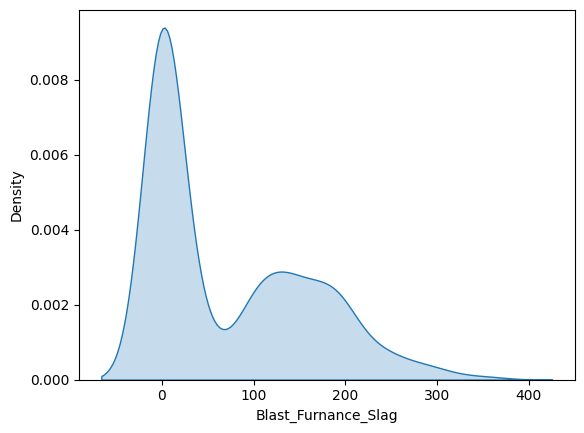

In [9]:
sns.kdeplot(data=df, x='Blast_Furnance_Slag', fill=True)
plt.show()

In [10]:
x = df.drop('Concrete_Strength', axis=1)
y = df['Concrete_Strength']

In [11]:
x['Blast_Furnance_Slag'] = np.log1p(x['Blast_Furnance_Slag'])
x['Fly_Ash'] = np.log1p(x['Fly_Ash'])
x['Superplasticizer'] = np.log1p(x['Superplasticizer'])
x['Age_Day'] = np.log1p(x['Age_Day'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in x.select_dtypes(include=['float64', 'int64']).columns:
    x[col] = mms.fit_transform(df[[col]])

In [13]:
x.head(4)

Cement  Blast_Furnance_Slag  Fly_Ash     Water  Superplasticizer  \
0  1.000000             0.000000      0.0  0.321357           0.07764   
1  1.000000             0.000000      0.0  0.321357           0.07764   
5  0.374429             0.317195      0.0  0.848303           0.00000   
7  0.634703             0.264329      0.0  0.848303           0.00000   

   Coarse_Aggregate  Fine_Aggregate   Age_Day  
0          0.694767        0.205720  0.226891  
1          0.738372        0.205720  0.226891  
5          0.380814        0.190667  0.747899  
7          0.380814        0.000000  0.226891

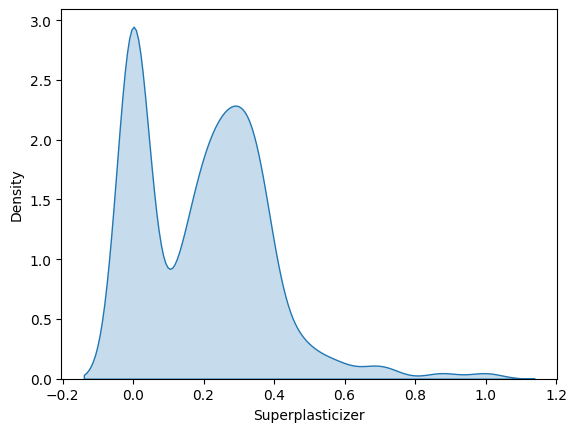

In [14]:
sns.kdeplot(x='Superplasticizer', data=x, fill=True)
plt.show()

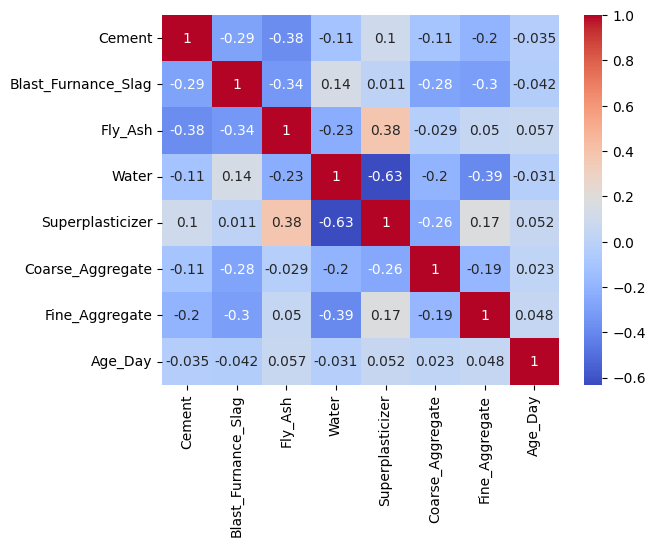

In [15]:
sns.heatmap(data=x.corr(), annot=True, cmap='coolwarm')
plt.show()

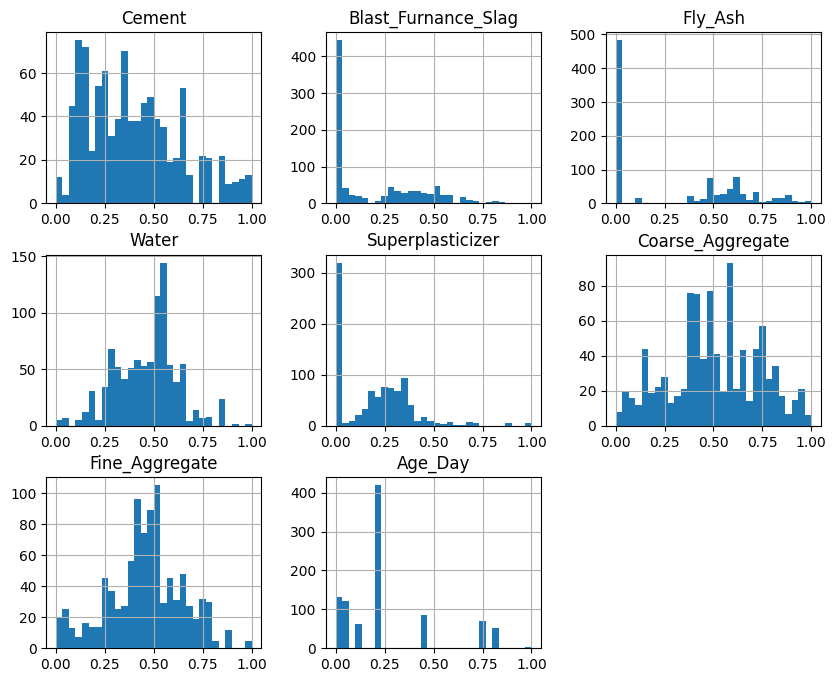

In [16]:
x.hist(bins=30, figsize=(10,8))
plt.show()

In [17]:
x.describe()

Cement  Blast_Furnance_Slag     Fly_Ash       Water  \
count  946.000000           946.000000  946.000000  946.000000   
mean     0.395658             0.202646    0.294846    0.467330   
std      0.236955             0.241136    0.322926    0.161392   
min      0.000000             0.000000    0.000000    0.000000   
25%      0.201689             0.000000    0.000000    0.344511   
50%      0.348174             0.055648    0.000000    0.497006   
75%      0.541096             0.397329    0.594203    0.560878   
max      1.000000             1.000000    1.000000    1.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate     Age_Day  
count        946.000000        946.000000      946.000000  946.000000  
mean           0.199001          0.504417        0.458728    0.263649  
std            0.183245          0.228349        0.192865    0.239464  
min            0.000000          0.000000        0.000000    0.000000  
25%            0.000000          0.380814        0.360010    0.050420  
50%            0.208696          0.491279        0.466859    0.226891  
75%            0.315062          0.694767        0.577020    0.226891  
max            1.000000          1.000000        1.000000    1.000000

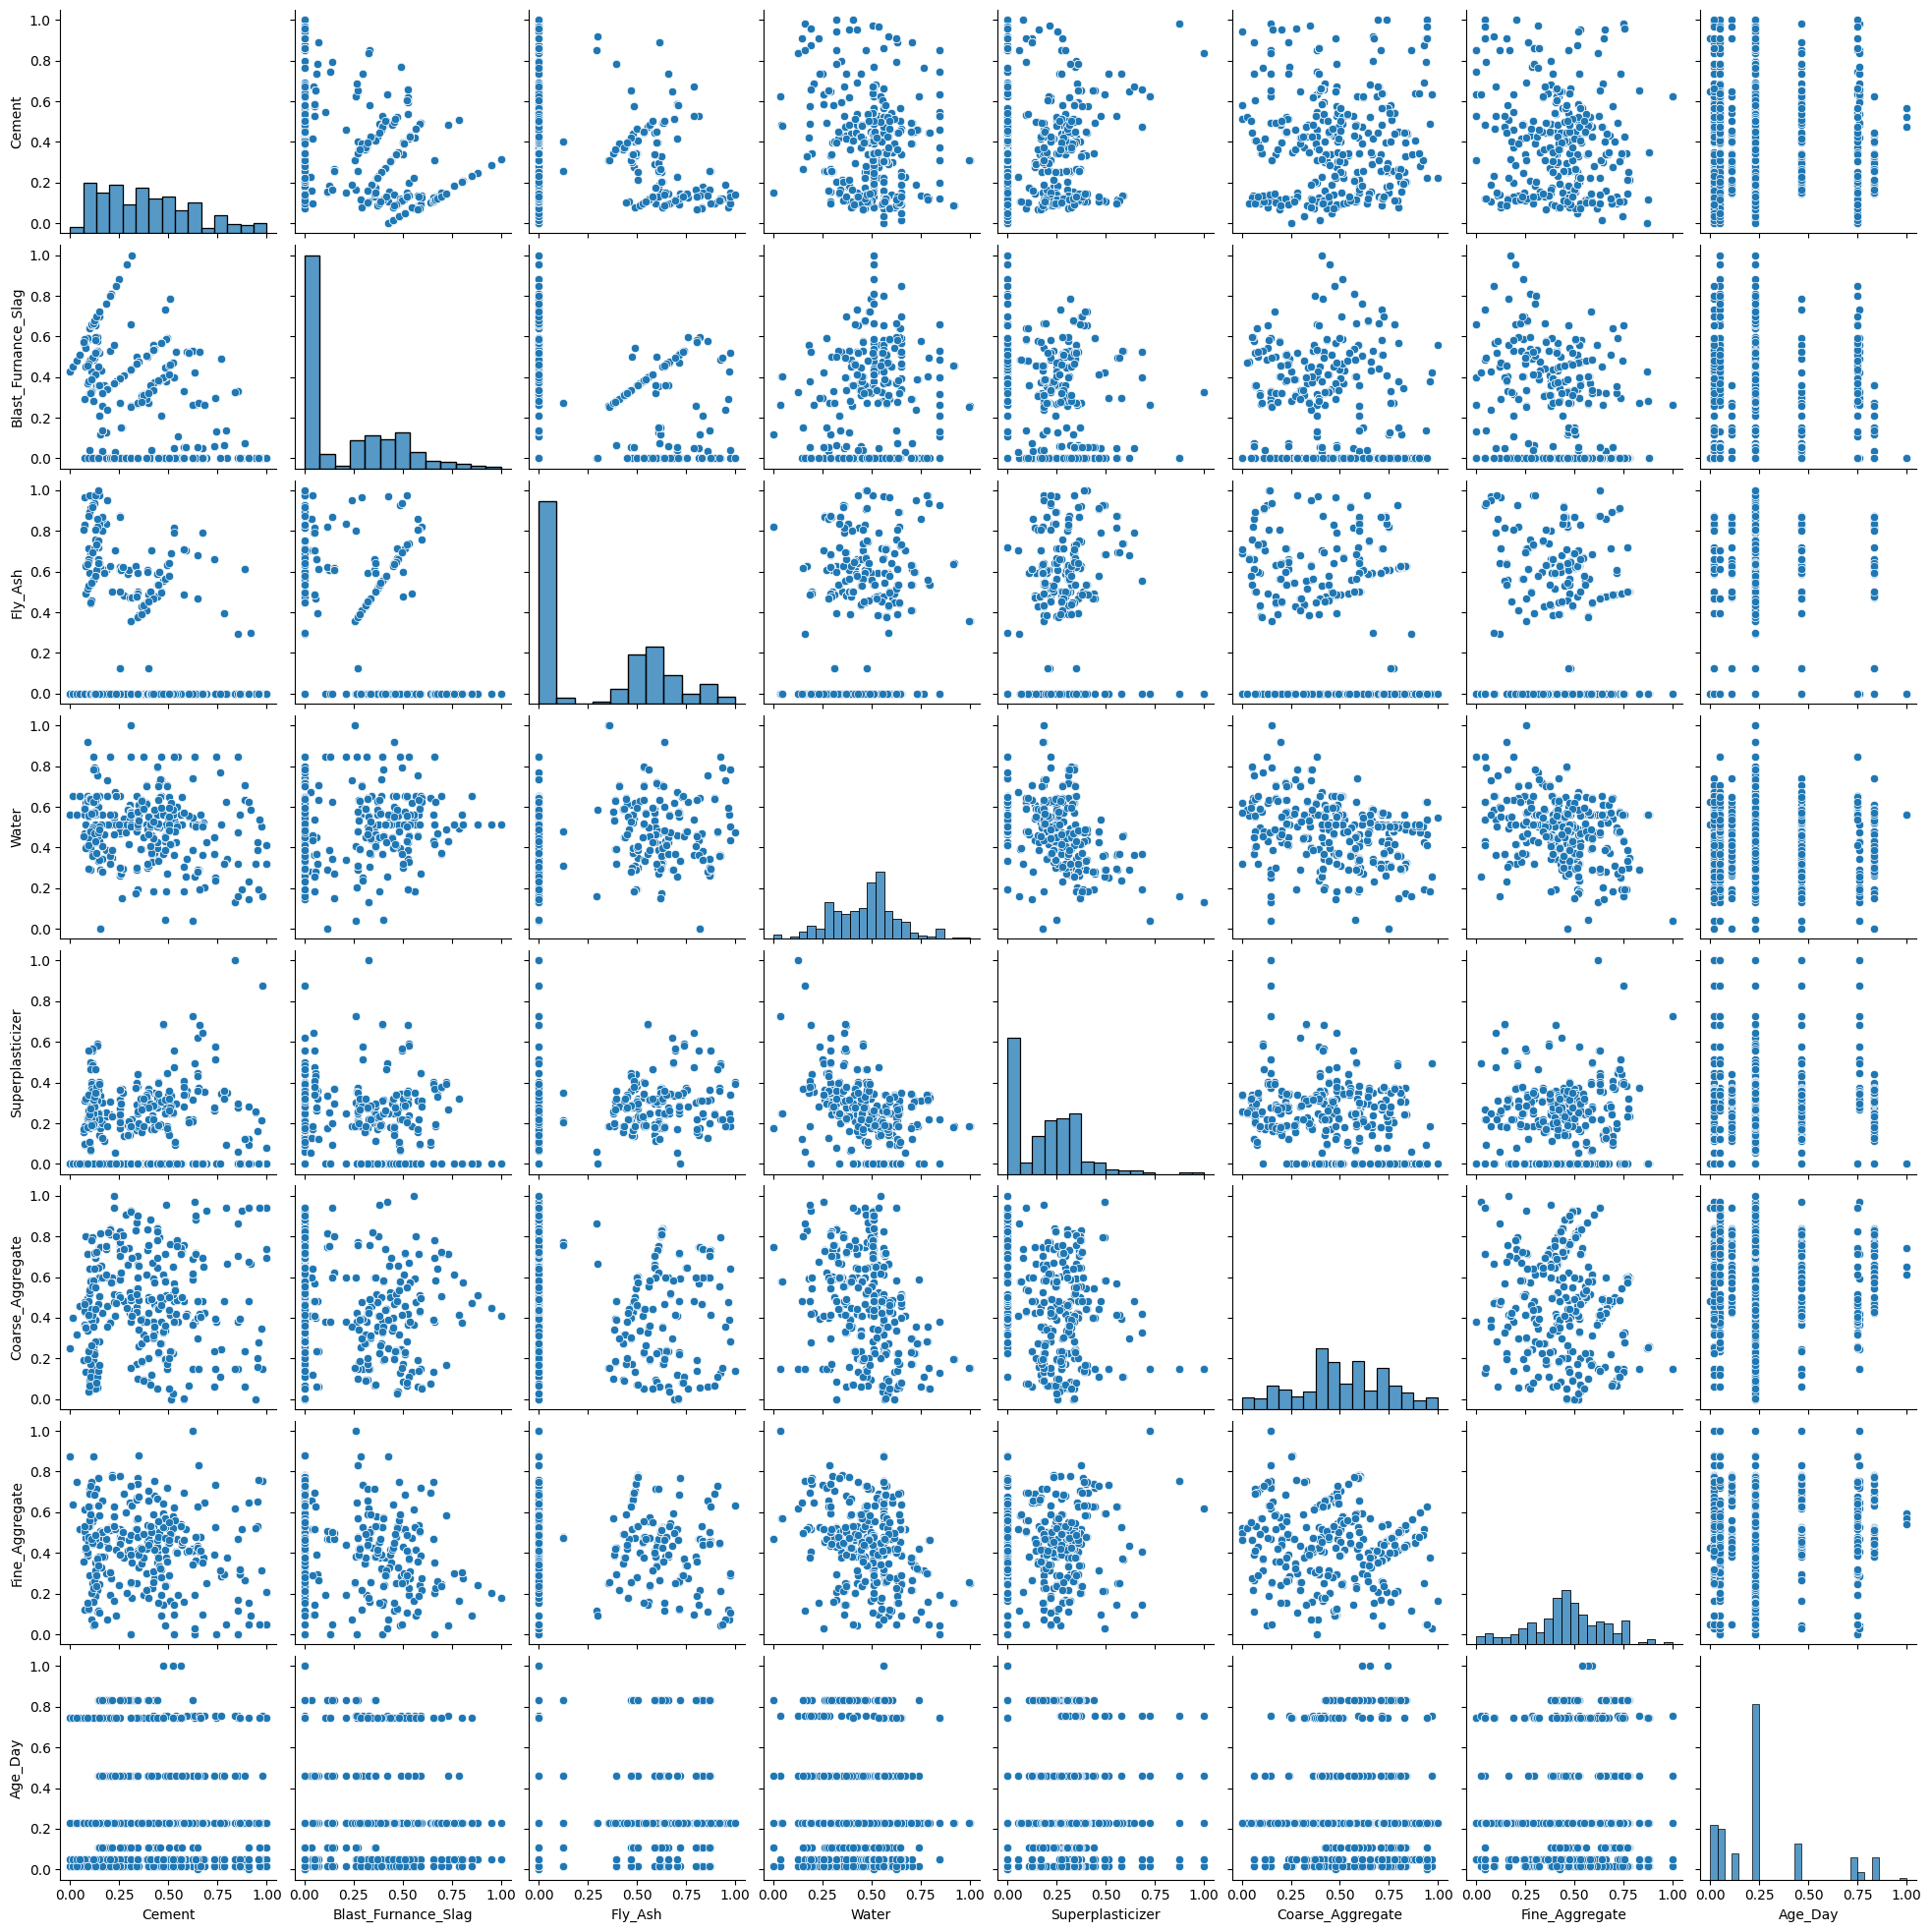

In [18]:
sns.pairplot(x)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear Regression Algorithm

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")

Testing Accuracy: 78.74
Training Accuracy: 73.72
Mean Squared Error: 6441.41
Mean Absolute Error: 6441.41
Mean Squared Error: 802.58


In [23]:
print(lr.coef_)
print(lr.intercept_)

[ 47.02124877  30.41682562  12.83689882 -23.55598627   4.64885946
   1.0987799   -0.83924048  36.02474146]
6.77555352662646


## Lasso Regularization Algorithm

In [50]:
ls = Lasso(alpha=0.05)
ls.fit(x_train, y_train)

Lasso(alpha=0.05)

In [61]:
print(f"Testing Accuracy: {round(ls.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(ls.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")

Testing Accuracy: 78.32
Training Accuracy: 73.54
Mean Squared Error: 6568.1
Mean Absolute Error: 6568.1
Mean Squared Error: 810.44


## Ridge Regularization Algorithm

In [54]:
re = Ridge(alpha=0.01)
re.fit(x_train, y_train)

Ridge(alpha=0.01)

In [62]:
print(f"Testing Accuracy: {round(re.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(re.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, re.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, re.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, re.predict(x_test))*100, 2)}")

Testing Accuracy: 78.74
Training Accuracy: 73.72
Mean Squared Error: 6442.16
Mean Absolute Error: 6442.16
Mean Squared Error: 802.63


In [64]:
infos = pd.DataFrame({'col_name': x.columns, 'Linear Regression': lr.coef_, 'Lasso': ls.coef_, 'Ridge': re.coef_})
infos.head(4)

col_name  Linear Regression      Lasso      Ridge
0               Cement          47.021249  43.766240  46.923423
1  Blast_Furnance_Slag          30.416826  27.021846  30.321292
2              Fly_Ash          12.836899  10.555616  12.775071
3                Water         -23.555986 -22.529379 -23.617354